Dataset:
    Age  Claim
0    20      1
1    22      1
2    25      1
3    27      1
4    30      1
5    32      0
6    35      0
7    37      0
8    40      0
9    42      0
10   45      0
11   47      0
12   50      0
13   52      0
14   55      0
15   57      0
16   60      0

Model Accuracy: 0.8333333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


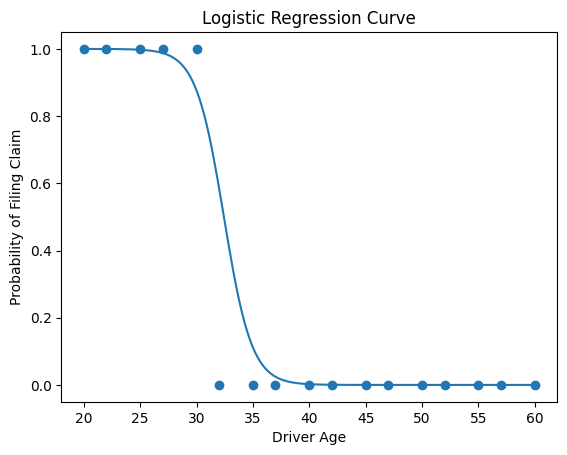


Age where probability crosses 50%: 32.42704323014262


In [1]:

# LOGISTIC REGRESSION PROJECT
# Insurance Claim Prediction


# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Create Dataset (Age vs Claim Filed)
data = {
    "Age": [20,22,25,27,30,32,35,37,40,42,45,47,50,52,55,57,60],
    "Claim": [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
}

df = pd.DataFrame(data)

print("Dataset:")
print(df)


# Step 3: Prepare Data


X = df[["Age"]]
y = df["Claim"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train Logistic Regression Model


model = LogisticRegression()
model.fit(X_train, y_train)



# Step 5: Evaluate Model


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", accuracy)


# Step 6: Plot Logistic Curve


# Generate age values for smooth curve
age_range = np.linspace(df["Age"].min(), df["Age"].max(), 200).reshape(-1,1)
probabilities = model.predict_proba(age_range)[:,1]

plt.figure()
plt.scatter(df["Age"], df["Claim"])
plt.plot(age_range, probabilities)
plt.xlabel("Driver Age")
plt.ylabel("Probability of Filing Claim")
plt.title("Logistic Regression Curve")
plt.show()


# Step 7: Find Age Where Probability = 50%


b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# Solve 0.5 = 1/(1+e-(b0+b1*x))
# When probability = 0.5 → b0 + b1*x = 0

age_50 = -b0 / b1

print("\nAge where probability crosses 50%:", age_50)